# 1 Simple Octave/MATLAB function 

In [1]:
import numpy as np
A = np.identity(5)
A

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

# 2 Linear regression with one variable 
We will implement linear regression with one variable to predict profits for a food truck.
Suppose we are the CEOs of a restaurant franchise and are considering different cities for opening a new outlet. 
The chain already has trucks in various cities and we have data for profits and populations from the cities.
We would like to use this data to select which city to expand to next.

In [2]:
import pandas as pd                     # to load data
import matplotlib.pyplot as plt         # to plot data
import numpy as np                      # to implement sth about matrix
from mpl_toolkits.mplot3d import Axes3D # to plot surface

In [3]:
# take a look
file_location = 'data/ex1data1.txt'
df = pd.read_csv(file_location, names=['Population','Profit'])
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


## 2.1 Plotting the Data 

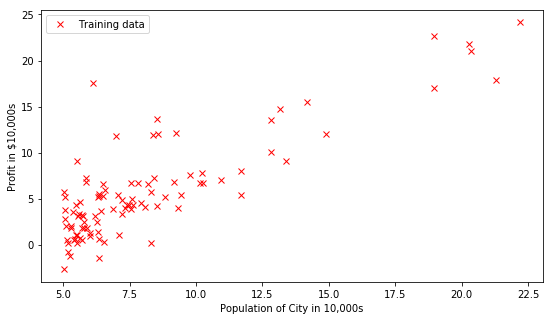

In [4]:
def plotData():
    plt.figure(figsize=(9,5))
    plt.plot(df['Population'], df['Profit'], 'rx',label='Training data')
    plt.xlabel('Population of City in 10,000s')
    plt.ylabel('Profit in $10,000s')

plotData()
plt.legend(loc='best')
plt.show()

## 2.2 Gradient Descent 
We will fit the linear regression parameters θ to our dataset using gradient descent.

In [5]:
X = df.as_matrix(columns=['Population'])
X = np.insert(X,0,1,axis=1) # add a column of 1's into X ; '0' indicates location 0 ; '1' indicates added value are 1's
y = df.as_matrix(columns=['Profit'])

m, n = X.shape # m:number of examples, n:number of features

iterations = 1500
alpha = 0.01

### 2.2.3 Computing the cost J(θ) 

In [6]:
theta = np.zeros((n,1)) # initialize fitting parameters
def h(X,theta):
    predict = np.dot(X,theta) # (m,n) x (n,1) 
    return predict            # return a (m,1) matrix

def computeCost(X,y,theta):
    J = np.mean((h(X,theta)-y)**2)/2
    return J

J = computeCost(X,y,theta)
print('With theta = [0 ; 0]\nCost computed = {:.2f}'.format(J))
print('Expected cost value (approx) 32.07')

With theta = [0 ; 0]
Cost computed = 32.07
Expected cost value (approx) 32.07


### 2.2.4 Gradient descent 

In [7]:
theta = np.zeros((n,1)) # initialize fitting parameters
def gradientDescent(X,y,theta,iterations,alpha):
    J_vals = [] # for 2.4 Visualizing J(θ)   
    for _ in range(iterations):
        theta -= (alpha/m)*np.dot(X.T,(h(X,theta)-y))     
        J_vals.append(computeCost(X,y,theta))          
    return theta, J_vals

theta, J_vals = gradientDescent(X,y,theta,iterations,alpha)

print('Theta found by gradient descent:')
print(theta)
print('Expected theta values (approx)')
print(' -3.6303\n  1.1664')

Theta found by gradient descent:
[[-3.63029144]
 [ 1.16636235]]
Expected theta values (approx)
 -3.6303
  1.1664


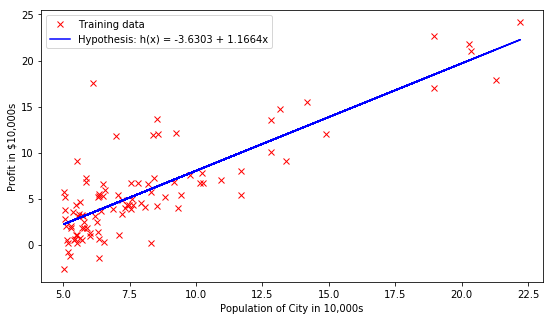

In [8]:
# visualize the result
plotData()
plt.plot(X[:,1], h(X,theta), 'b-', label='Hypothesis: h(x) = %0.4f + %0.4fx'%(theta[0],theta[1]))
plt.legend()
plt.show()

In [9]:
# try to predict 
predict1 = float(np.dot(np.array([[1,3.5]]),theta))*10000
predict2 = float(np.dot(np.array([[1,7]]), theta))*10000
print('For population = 35,000, we predict a profit of ${:.2f}'.format(predict1))
print('For population = 70,000, we predict a profit of ${:.2f}'.format(predict2))

For population = 35,000, we predict a profit of $4519.77
For population = 70,000, we predict a profit of $45342.45


## 2.4 Visualizing J(θ) 

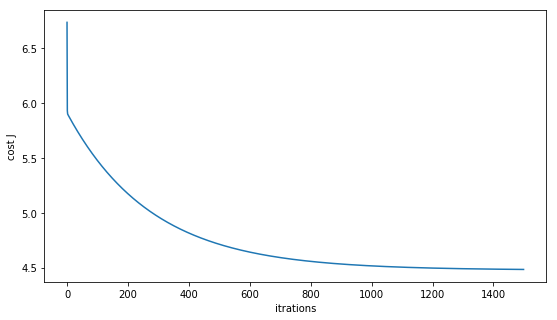

In [10]:
plt.figure(figsize=(9,5))
plt.plot(J_vals)
plt.xlabel('itrations')
plt.ylabel('cost J')
plt.show()

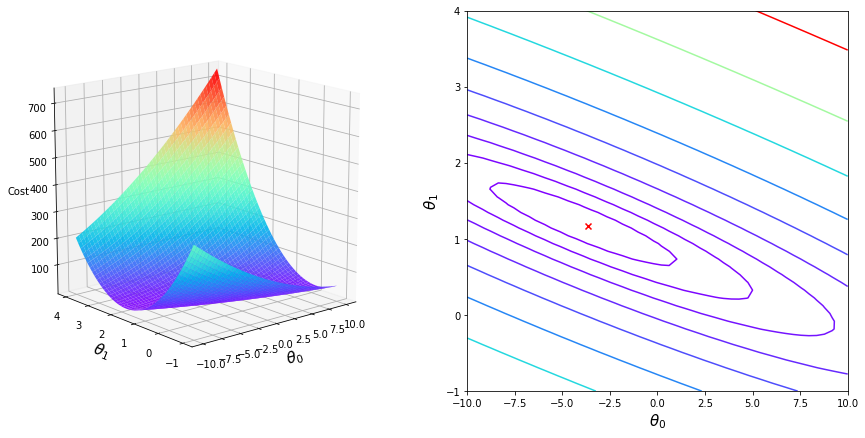

In [11]:
xvals = np.linspace(-10,10,50)
yvals = np.linspace(-1,4,50)
xx,yy = np.meshgrid(xvals,yvals)
zz = np.zeros(xx.shape)
    
for i,xi in enumerate(xvals):
    for j,yj in enumerate(yvals):
        zz[i,j] = computeCost(X,y,theta=[[xi],[yj]]) 

zz = zz.transpose()

fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)

# left plot
ax1.plot_surface(xx, yy, zz, rstride=1, cstride=1, 
                 alpha=0.9,           # alpha controls transparency 
                 cmap=plt.cm.rainbow) # https://matplotlib.org/examples/color/colormaps_reference.html
ax1.set_zlabel('Cost',)
ax1.view_init(elev=15, azim=230)      # elev controls xy-plane ; azim controls z-axis rotation

# right plot
ax2.contour(xx,yy,zz,np.logspace(-4, 3, 30),cmap=plt.cm.rainbow)
ax2.scatter(theta[0], theta[1], c='r', marker='x')

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=15)
    ax.set_ylabel(r'$\theta_1$', fontsize=15)

plt.show()

# 3 Linear regression with multiple variables 

In [12]:
file_location = 'data/ex1data2.txt'
df = pd.read_csv(file_location, names=['size','bedrooms','Price'])
df.head()

,size,bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## 3.1 Feature Normalization 
If the scale of feature differs from each other dramatically, then it will reduce the effiency of gradient descent.
So, we have to normalize it first.

In [13]:
X = df.as_matrix(columns=['size','bedrooms'])
y = df.as_matrix(columns=['Price'])

X_mean, X_std = np.mean(X,axis=0), np.std(X,axis=0)
X = (X - X_mean)/ X_std
X[:5]

array([[ 0.13141542, -0.22609337],
       [-0.5096407 , -0.22609337],
       [ 0.5079087 , -0.22609337],
       [-0.74367706, -1.5543919 ],
       [ 1.27107075,  1.10220517]])

## 3.2 Gradient Descent 

In [14]:
X = np.insert(X,0,1,axis=1) # add a column of 1's into X
n = X.shape[1] # number of features

theta_final_1, J_vals_1 = gradientDescent(X, y, theta=np.zeros((n,1)), iterations=1500, alpha=.01)
theta_final_2, J_vals_2 = gradientDescent(X, y, theta=np.zeros((n,1)), iterations=1500, alpha=.03)
theta_final_3, J_vals_3 = gradientDescent(X, y, theta=np.zeros((n,1)), iterations=1500, alpha=1. )

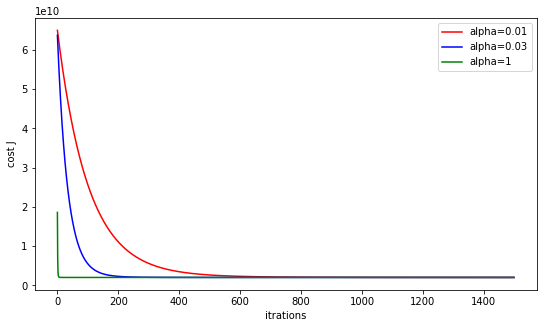

If the learning rate is chosen properly, then the cost will converge guickly.


In [15]:
plt.figure(figsize=(9,5))
plt.plot(J_vals_1,'r', label='alpha=0.01')
plt.plot(J_vals_2,'b', label='alpha=0.03')
plt.plot(J_vals_3,'g', label='alpha=1')
plt.xlabel('itrations')
plt.ylabel('cost J')
plt.legend(loc='best')
plt.show()
print('If the learning rate is chosen properly, then the cost will converge guickly.')

/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:70: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in square
  


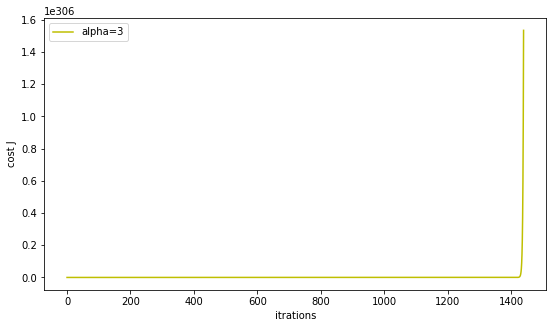

If learning rate is too large, then the cost will not converge.


In [16]:
theta_final_4, J_vals_4 = gradientDescent(X, y, theta=np.zeros((n,1)), iterations=1500, alpha=3. )
plt.figure(figsize=(9,5))
plt.plot(J_vals_4,'y', label='alpha=3')
plt.xlabel('itrations')
plt.ylabel('cost J')
plt.legend(loc='best')
plt.show()
print('If learning rate is too large, then the cost will not converge.')

In [17]:
# Try to predict 
test = np.array([[1650.,3.]])
def predict(test):
    test = (test - X_mean)/X_std      # normalize it first
    test = np.insert(test,0,1,axis=1) # add 1 for theta_0
    pred = h(test,theta_final_3)      # we choose the theta where learning rate is 1.0
    return float(pred)

pred = predict(test)
print('Linear regression predict the price of a house with 1650 square feet and 3 bedrooms to be ${:.2f}'.format(pred))

Linear regression predict the price of a house with 1650 square feet and 3 bedrooms to be $293081.46


## 3.3 Normal Equations 

In [18]:
from numpy.linalg import inv
def normalEqn(test):
    X = df.as_matrix(columns=['size','bedrooms'])
    X = np.insert(X,0,1,axis=1)
    y = df.as_matrix(columns=['Price'])
    theta = np.dot(np.dot(inv(np.dot(X.T,X)),X.T),y) # normal equation θ = (X.T*X)**(−1)*X.T* ⃗y !! (linear algebra)
    test = np.insert(test,0,1,axis=1)
    pred = h(test,theta)
    return float(pred)

pred = normalEqn(test)
print('Normal equation predicts the price of a house with 1650 square feet and 3 bedrooms to be ${:.2f}'.format(pred))
print('We dont need to scale features when we are applying Normal equation !')

Normal equation predicts the price of a house with 1650 square feet and 3 bedrooms to be $293081.46
We dont need to scale features when we are applying Normal equation !
